# Bonds Project

*By Daniel Deutsch and José Lucas Barretto*

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Matplotlib style
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'axes.prop_cycle': plt.cycler(color=['#4C72B0', '#C44E52', '#55A868', '#8172B2', '#CCB974', '#64B5CD']),
    'axes.facecolor': '#EAEAF2'
})

# Question 1

A bond is a fixed income security that represents a loan made by an investor to a borrower. A bond can be issued by governmental or corporate institutions to finance their operations. Investors that buy bonds are lending money to the bond issuer, and, in return, they receive a fixed interest (or coupons) for their investment.

Bonds are issued with a given price, and pay back a given face-value at the date of maturity, as well as coupon rates (interest) on the given coupon dates.

Because bonds are fixed income instruments, their price is closely related to interest rates. Moreover, bond prices vary inversely with interest rates. This happens because if interest rates move up, investors will prefer buying newly issued bonds that pay more interest, hence drawing down the price of bonds that pay less interest. The contrary example is also true.

# Question 2

Once we accessed the [European Central Bank Website](https://drive.google.com/drive/u/0/folders/1SSQgOKYpzfZC_0HwGrV7tfcd9-6u5r8k) we selected the date Jan 4th 2010 for AAA rated bonds. This parameter selection provided us the following spot yields (for maturities 0.5m, 1y, 1.5y, ..., 5y):

In [13]:
# Defines parameters
n = 5     # Number of years 
m = 2     # Number of payment periods in a year (2 because its semi-annual payments)
M = 100   # Par value (100$ According to the European Central Bank Website)

# Obtains the spot yields from the European Central Bank Website
df = pd.DataFrame([
    (0.5, 0.00490),
    (1, 0.00833),
    (1.5, 0.01159),
    (2, 0.01446),
    (2.5, 0.01702),
    (3, 0.01933),
    (3.5, 0.02145),
    (4, 0.02339),
    (4.5, 0.02518),
    (5, 0.02683),
], columns=['maturity', 'spot_rate'])

df

,maturity,spot_rate
0,0.5,0.00490
1,1.0,0.00833
2,1.5,0.01159
3,2.0,0.01446
4,2.5,0.01702
5,3.0,0.01933
6,3.5,0.02145
7,4.0,0.02339
8,4.5,0.02518
9,5.0,0.02683


# Question 3

The spot rate represents the yield to maturity of a hypothetical zero-coupon bond. In other words, the spot rate represents the interest rate at which future returns are discounted in order to estimate their present value. These values are not always observable in the market, and must therefore be estimated from existing zero coupon bonds and fixed coupon bond prices or yields. It can be obtained through the following:

\begin{align*}
    y & = m \left[\left(\frac{M}{P}\right)^{\frac{1}{m*n}}-1\right]
\end{align*}

Therefore, the price $P$ of the STRIPS can be obtained through:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{y}{m}\right)^{m*n}}
\end{align*}

In [14]:
# Calculates the STRIP for each spot rate
df['strip'] = M / (1 + df['spot_rate'] / m)**(m*n)

df

,maturity,spot_rate,STRIP
0,0.5,0.00490,97.582693
1,1.0,0.00833,95.928841
2,1.5,0.01159,94.385499
3,2.0,0.01446,93.049378
4,2.5,0.01702,91.875118
5,3.0,0.01933,90.829512
6,3.5,0.02145,89.881419
7,4.0,0.02339,89.023356
8,4.5,0.02518,88.239626
9,5.0,0.02683,87.523911


We can observe from the print above that the STRIPs are below the par value, which is a direct result from the inverse relationship between the interest rate (spot rate) and the bond price (STRIP). In other words, when interest rates rise, bond prices fall, which means that it is being traded at a discount. Consequently, when interest rates fall, bond prices rise, which means that it is being traded at a premium.

# Question 4

\begin{align*}
    f(t) & = m * \left(-1 + \frac{\left(1+\frac{s_t}{m}\right)^{l_{s_t}}}{\left(1+\frac{s_{t-1}}{m}\right)^{l_{s_{t-1}}}}\right)
\end{align*}

In [17]:
# Obtains the total number of periods for the respective spot rate
df['l'] = 2*df['maturity']

# Calculates the forward rate
df['forward_rate'] = m * (-1 + ((1 + df['spot_rate']/m)**(df['l']*df['spot_rate'])) / ((1 + df['spot_rate'].shift()/m)**(df['l']*df['spot_rate'].shift())) )

df

,maturity,spot_rate,STRIP,forward_rate,l
0,0.5,0.00490,97.582693,NaN,1.0
1,1.0,0.00833,95.928841,0.000091,2.0
2,1.5,0.01159,94.385499,0.000194,3.0
3,2.0,0.01446,93.049378,0.000298,4.0
4,2.5,0.01702,91.875118,0.000401,5.0
5,3.0,0.01933,90.829512,0.000500,6.0
6,3.5,0.02145,89.881419,0.000601,7.0
7,4.0,0.02339,89.023356,0.000690,8.0
8,4.5,0.02518,88.239626,0.000776,9.0
9,5.0,0.02683,87.523911,0.000850,10.0


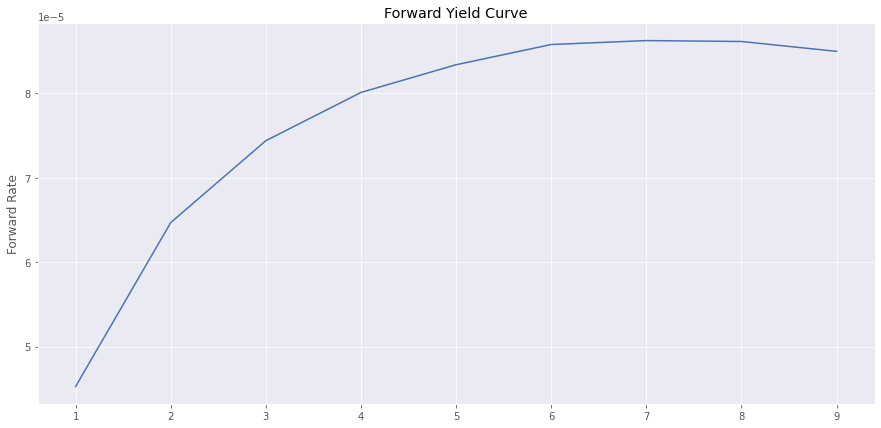

In [16]:
# Plots the forward yield curve
df['forward_rate'].plot()
plt.title("Forward Yield Curve")
plt.ylabel("Forward Rate")
plt.xlabel("")
plt.show()

# Question 5

# Question 6

# Question 7